In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import calendar
import os
import pickle
import seaborn as sns


In [3]:
data = pd.read_csv('data.csv')

In [8]:
data

,Year,GoldPrice(24k_10g),Sensex
0,1980,1330.0,148.25
1,1981,1670.0,227.72
2,1982,1645.0,235.83
3,1983,1800.0,252.92
4,1984,1970.0,271.87
5,1985,2130.0,527.36
6,1986,2140.0,524.45
7,1987,2570.0,442.17
8,1988,3130.0,666.26
9,1989,3140.0,778.64


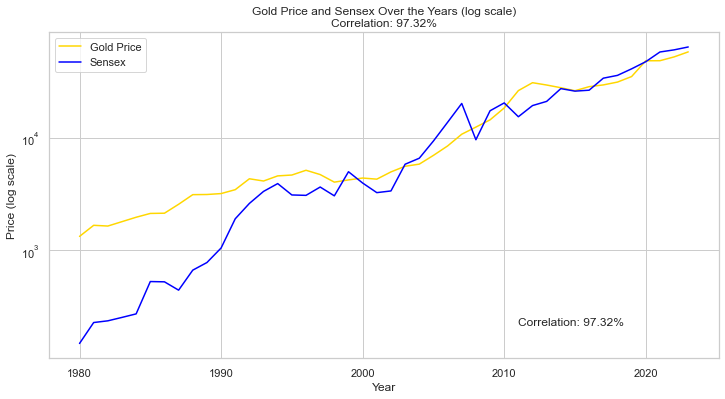

In [12]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for GoldPrice in log scale
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='GoldPrice(24k_10g)', label='Gold Price', color='gold')
plt.yscale('log')  # Set the y-axis to log scale for GoldPrice

# Create a line plot for Sensex in log scale
sns.lineplot(data=data, x='Year', y='Sensex', label='Sensex', color='blue')
plt.yscale('log')  # Set the y-axis to log scale for Sensex

# Calculate the correlation between 'GoldPrice' and 'Sensex'
correlation = np.corrcoef(data['GoldPrice(24k_10g)'], data['Sensex'])[0, 1] * 100
correlation_text = f'Correlation: {correlation:.2f}%'

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price (log scale)')
plt.title(f'Gold Price and Sensex Over the Years (log scale)\n{correlation_text}')

# Display the correlation as text on the plot
plt.annotate(correlation_text, xy=(0.7, 0.1), xycoords='axes fraction')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [17]:
# Create a new DataFrame to store CAGR for each year
cagr_data = pd.DataFrame()

# Set the number of years for the investment period
investment_period = 8

# Calculate CAGR for each year
for i in range(1, investment_period + 1):
    # Calculate the CAGR for the current year
    initial_price = data['GoldPrice(24k_10g)'].shift(i)
    final_price = data['GoldPrice(24k_10g)']
    cagr = (((final_price / initial_price) ** (1 / i)) - 1) * 100
    cagr_data[f'CAGR_{i}Year'] = cagr
    
# Concatenate the 'Year' column from the original DataFrame
cagr_data['Year'] = data['Year']

# Reset the index
cagr_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cagr_data)


    CAGR_1Year  CAGR_2Year  CAGR_3Year  CAGR_4Year  CAGR_5Year  CAGR_6Year  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1    25.563910         NaN         NaN         NaN         NaN         NaN   
2    -1.497006   11.213403         NaN         NaN         NaN         NaN   
3     9.422492    3.819281   10.613200         NaN         NaN         NaN   
4     9.444444    9.433468    5.661455   10.319846         NaN         NaN   
5     8.121827    8.781126    8.994496    6.271249    9.876696         NaN   
6     0.469484    4.225449    5.936858    6.797717    5.084693    8.249780   
7    20.093458    9.844106    9.266986    9.311324    9.333549    7.449098   
8    21.789883   20.938696   13.689820   12.271501   11.700307   11.317405   
9     0.319489   10.534605   13.633214   10.188815    9.772280    9.717573   
10    1.910828    1.112028    7.581836   10.581901    8.481099    8.421137   
11    8.312500    5.062917    3.457364    7.764039   10.124248  

In [47]:
def plot_grid(df, asset_name):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create a heatmap to visualize CAGR with custom colormap, increased cell height, and smaller font size
    plt.figure(figsize=(20, 20))
    heatmap = sns.heatmap(data=df.set_index('Year'), cmap=cmap, annot=True, fmt=".2f", cbar=True, annot_kws={"size": 15}, linewidths=0.5)
    plt.xlabel('Investment Period (Years)')
    plt.ylabel('Year')
    plt.title(f'CAGR Heatmap for {asset_name} Investment')

    # Increase cell size
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), size=15)
    heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), size=15)

    # Show the plot
    plt.show()


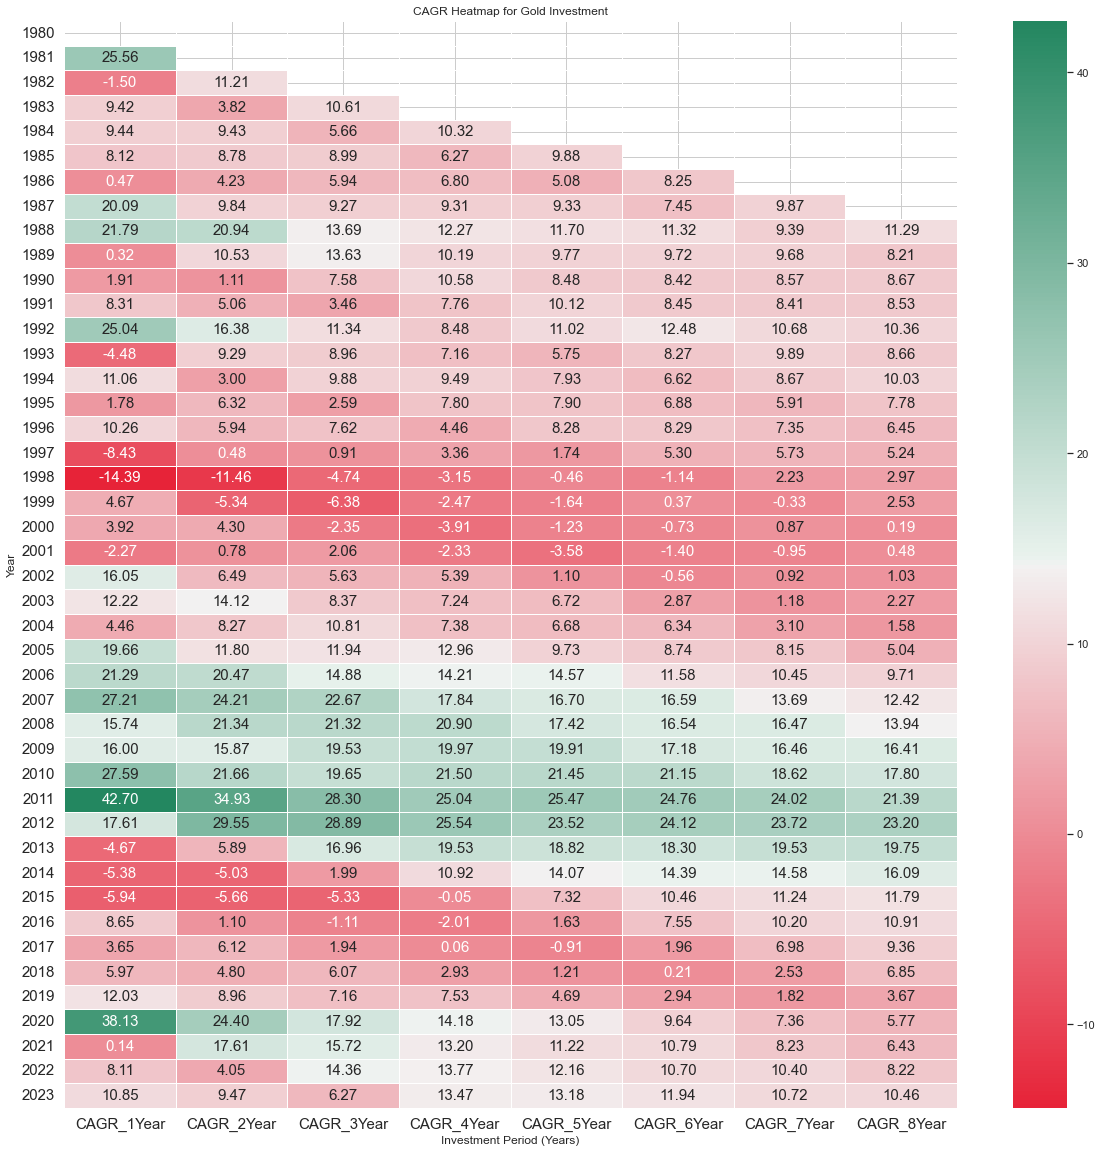

In [48]:
plot_grid(cagr_data, 'Gold')

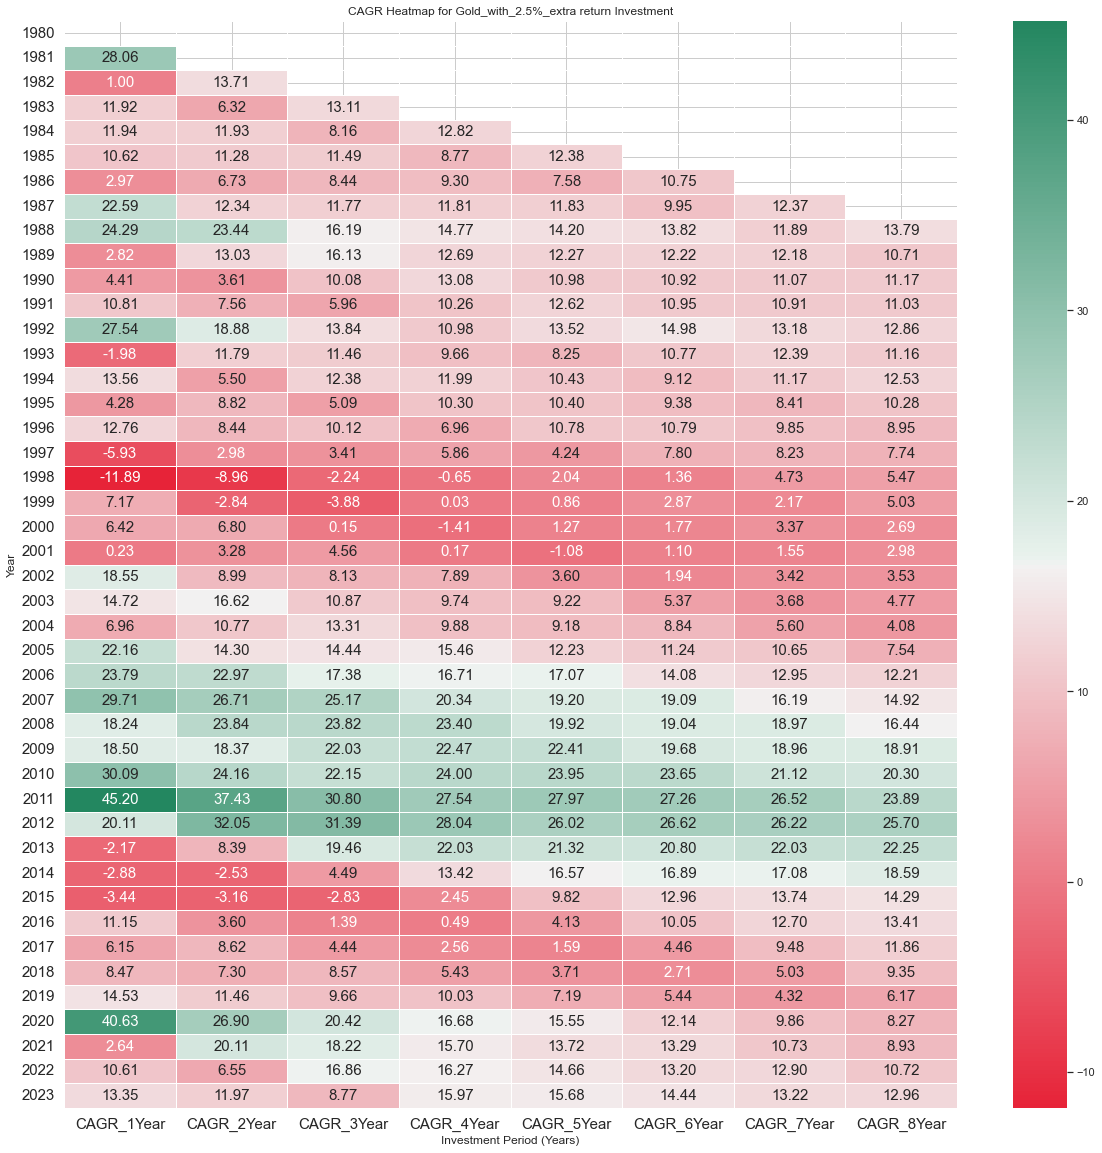

In [49]:
# Create a new DataFrame with 2.5 added to all CAGR values
cagr_data_2_5 = cagr_data.copy()  # Copy the original DataFrame

# Add 2.5 to all CAGR columns
cagr_data_2_5.iloc[:, :-1] += 2.5

# Display the plot
plot_grid(cagr_data_2_5, 'Gold_with_2.5%_extra return')


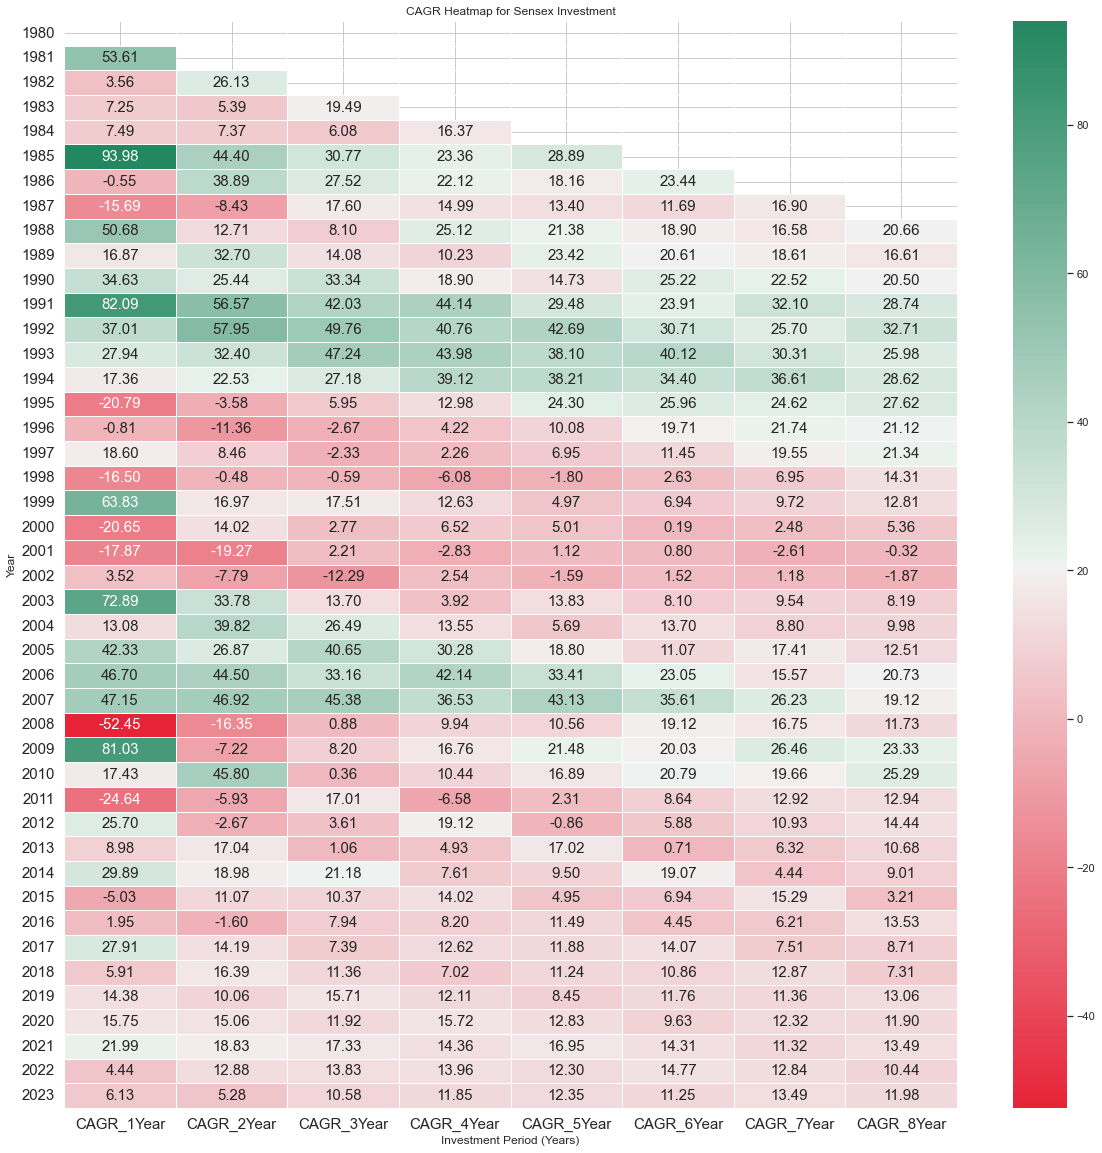

In [54]:
#SENSEX Returns:
# Create a new DataFrame to store CAGR for each year
cagr_data_sensex = pd.DataFrame()

# Set the number of years for the investment period
investment_period = 8

# Calculate CAGR for each year
for i in range(1, investment_period + 1):
    # Calculate the CAGR for the current year
    initial_price = data['Sensex'].shift(i)
    final_price = data['Sensex']
    cagr = (((final_price / initial_price) ** (1 / i)) - 1) * 100
    cagr_data_sensex[f'CAGR_{i}Year'] = cagr
    
# Concatenate the 'Year' column from the original DataFrame
cagr_data_sensex['Year'] = data['Year']

# Reset the index
cagr_data_sensex.reset_index(drop=True, inplace=True)

plot_grid(cagr_data_sensex, 'Sensex')


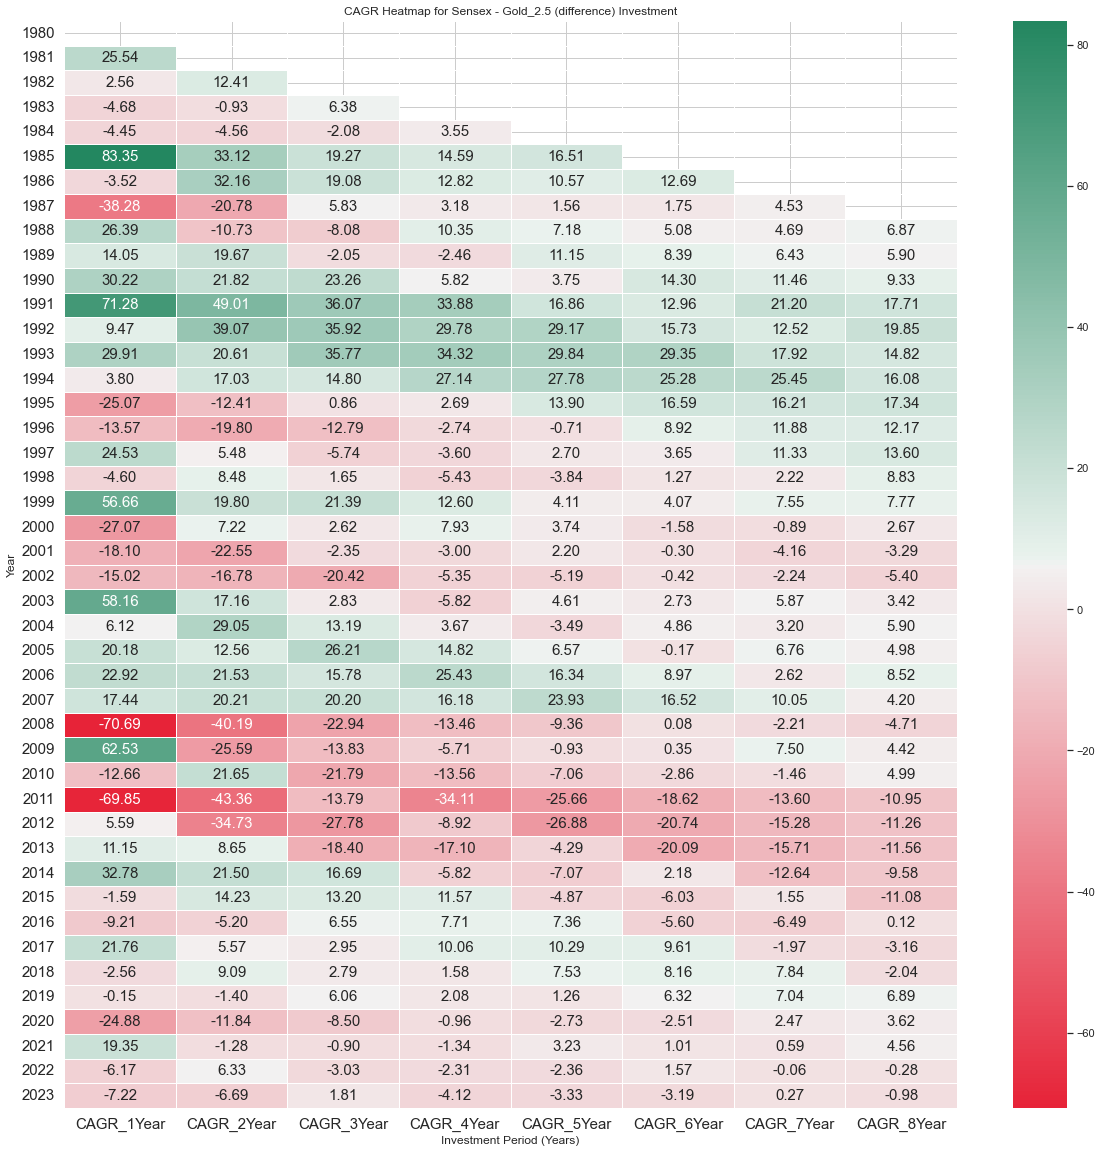

In [58]:
# Create a new DataFrame with the difference between cagr_data_sensex and cagr_data_2.5
cagr_diff = cagr_data_sensex.copy()  # Copy the structure of cagr_data_sensex

# Subtract the corresponding CAGR values
cagr_diff.iloc[:, :-1] = cagr_data_sensex.iloc[:, :-1] - cagr_data_2_5.iloc[:, :-1]

plot_grid(cagr_diff, 'Sensex - Gold_2.5 (difference)')